In [1]:
suppressMessages(suppressWarnings(library(vcd)))
suppressMessages(suppressWarnings(library(plyr)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(ggbeeswarm)))
suppressMessages(suppressWarnings(library(vcdExtra)))
suppressMessages(suppressWarnings(library(dplyr)))

# figure 4
Regression analysis for genes associated with EBML by repeat length and gene expression (rpkm). The published version shows 15 genes. For the purpose of this notebook simple change the gene <- "GPX7" variable and rerun to see results for other genes. You can run any genes listed in the S4_dataset.txt file. 


	Pearson's product-moment correlation

data:  df$length and df$rpkm
t = -3.526, df = 185, p-value = 0.0005318
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3807267 -0.1114632
sample estimates:
       cor 
-0.2509428 


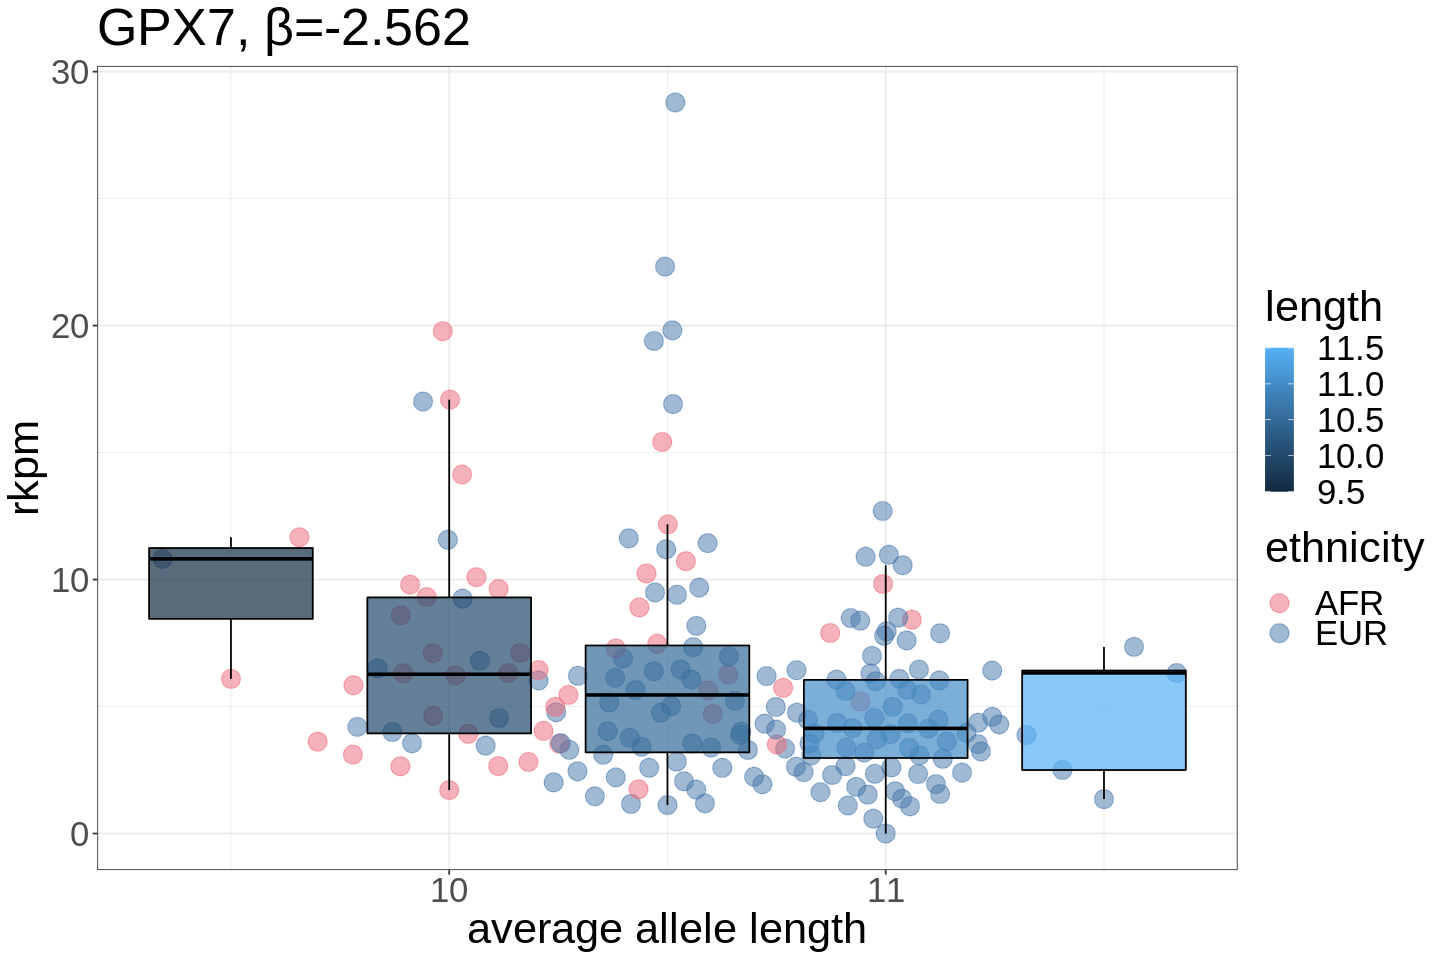

In [2]:
myPlot <- function (dataF,beta) 
{
  a <- ggplot(data = dataF, aes(x = length, y = rpkm, fill = length, group=length, color=ethnicity))
  a <- a + geom_quasirandom(alpha = 0.5,width=.35,size=5,show.legend = TRUE)
  a <- a + geom_boxplot(show.legend = FALSE,color="black",alpha=.7,outlier.shape = NA)
  a <- a + scale_color_manual(values=c('#EE6677','#4477AA'))
  a <- a + theme_bw()
  a <- a + ggtitle(paste0(gene,", \u03b2=",beta))
  a <- a + ylab("rkpm")
  a <- a + xlab("average allele length")
  a <- a + theme(text = element_text(size = 26))
  return(a)
}
data <- read.table("../data/S4_Dataset.txt",header=TRUE, sep = " ")
gene <- "GPX7"
options(repr.plot.width=12, repr.plot.height=8)
df <- data[which(data$gene==gene),]
linear <- lm(df$rpkm ~ df$length)
beta <- round(linear$coefficients[2][1],digits=3)
cor.test(df$length,df$rpkm)
plot(myPlot(df,beta))